 Orden Lógico para un EDA


Análisis bivariante

Examina relaciones entre pares de variables (correlaciones, gráficos de dispersión, heatmaps, etc.).



Feature engineering (si aplica)

Crear nuevas variables útiles, transformar escalas, etc.

Modelado o pasos siguientes según el objetivo del proyecto.

## TÍTULO

## Dormir mejor con datos: modelado de hábitos y salud del sueño con ML

### TEMA

Este proyecto tiene como objetivo explorar cómo los datos del estilo de vida pueden influir en la calidad del sueño. Utilizando el dataset Sleep Health and Lifestyle de Kaggle, que contiene información sobre hábitos de sueño, condiciones médicas, niveles de estrés y comportamiento diario, se aplicarán técnicas de análisis de datos y aprendizaje automático para identificar patrones, predecir trastornos del sueño, y descubrir relaciones clave entre variables personales y la salud del descanso. El análisis busca proporcionar información útil que permita recomendar mejoras personalizadas en los hábitos diarios para favorecer un sueño más saludable.

### OBJETIVOS

- **Identificar los factores más influyentes y ayudar a mejorar hábitos para dormir mejor**
- **Analizar los hábitos de sueño:** Identificar patrones comunes de duración y calidad del sueño entre diferentes grupos demográficos (edad, ocupación, género).
- **Explorar la relación entre estilo de vida y salud del sueño:** Evaluar cómo factores como el estrés, la actividad física, el consumo de alcohol o cafeína influyen en la calidad y duración del sueño.
- **Predecir problemas de sueño:** Desarrollar modelos de aprendizaje automático que permitan predecir condiciones como la apnea del sueño o los ronquidos, a partir de variables de estilo de vida y salud.
- **Clasificar la calidad del sueño:** Utilizar técnicas de clasificación para categorizar a los individuos según su nivel de calidad de sueño (bueno, regular, malo).
- **Generar recomendaciones personalizadas:** Proponer sugerencias de mejora en los hábitos diarios basadas en los datos individuales y predicciones del modelo.

### Carga de librerias necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Importar para guardar y cargar el modelo
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#### Obtención de lo datos
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset


###  Carga y exploración inicial del dataset

In [2]:
df = pd.read_csv('../data/sleep_health.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


#### Descripción columans del DataSet

- **Person ID**	Identificador único de cada persona.
- **Gender**	Género de la persona (Male o Female).
- **Age**	Edad de la persona.
- **Occupation**	Profesión u ocupación de la persona.
- **Sleep Duration**	Duración promedio del sueño en horas.
- **Quality of Sleep**	Calidad del sueño (escala numérica, posiblemente de 1 a 10).
- **Physical Activity Level**	Nivel de actividad física (valor numérico, posiblemente en minutos o una escala).
- **Stress Level**	Nivel de estrés percibido (escala numérica).
- **MI Category**	Categoría de Índice de Masa Corporal (Underweight, Normal, Overweight, Obese).
- **Blood Pressure**	Presión arterial (formato: sistólica/diastólica).
- **Heart Rate**	Frecuencia cardíaca en reposo (latidos por minuto).
- **Daily Steps**	Número promedio de pasos diarios.
- **Sleep Disorder**	Tipo de trastorno del sueño diagnosticado (None, Insomnia, Sleep Apnea, etc.).

#### Vista general DataSet

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
# Ver valores nulos por columna
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

#### Limpieza de datos

In [7]:
# Imputación de valores nulos según el tipo de variable

# Para variables numéricas, usamos la media 
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)
        print(f"→ Imputados nulos en '{col}' con la media: {mean_value:.2f}")

# Para variables categóricas, usamos la moda (valor más frecuente)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"→ Imputados nulos en '{col}' con la moda: '{mode_value}'")

→ Imputados nulos en 'Sleep Disorder' con la moda: 'Sleep Apnea'


In [8]:
# Convertir todas las columnas de tipo object a category
for col in cat_cols:
    df[col] = df[col].astype('category')
    print(f"→ '{col}' convertido a tipo 'category'")

# 7. Verificación de tipos finales
print("\nTipos de datos después de limpieza:")
print(df.dtypes)

→ 'Gender' convertido a tipo 'category'
→ 'Occupation' convertido a tipo 'category'
→ 'BMI Category' convertido a tipo 'category'
→ 'Blood Pressure' convertido a tipo 'category'
→ 'Sleep Disorder' convertido a tipo 'category'

Tipos de datos después de limpieza:
Person ID                     int64
Gender                     category
Age                           int64
Occupation                 category
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category               category
Blood Pressure             category
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder             category
dtype: object


#### Verificación visual de outliers --- REVISAR

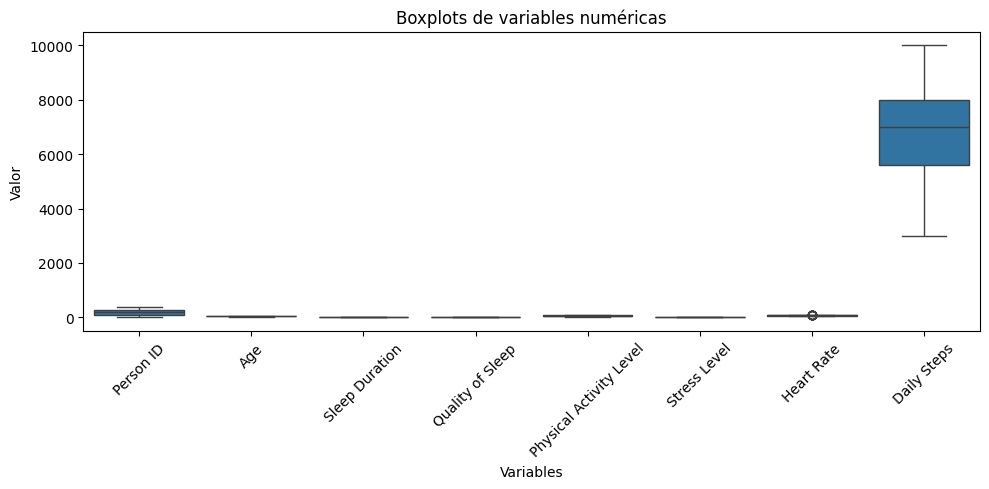

In [9]:
#Boxplots (diagrama de caja) — Para variables numéricas individuales

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number)

# Transformar a formato largo
df_melted = pd.melt(num_cols)

# Graficar boxplots juntos
plt.figure(figsize=(10, 5))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title("Boxplots de variables numéricas")
plt.xlabel("Variables")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análisis univariante
- Es el análisis de una sola variable a la vez para:
- Explorar su distribución
- Identificar outliers o valores faltantes
- Entender su tipo (numérica, categórica, binaria, etc.)
- Decidir si necesita tratamiento adicional (transformación, escalado, imputación...)



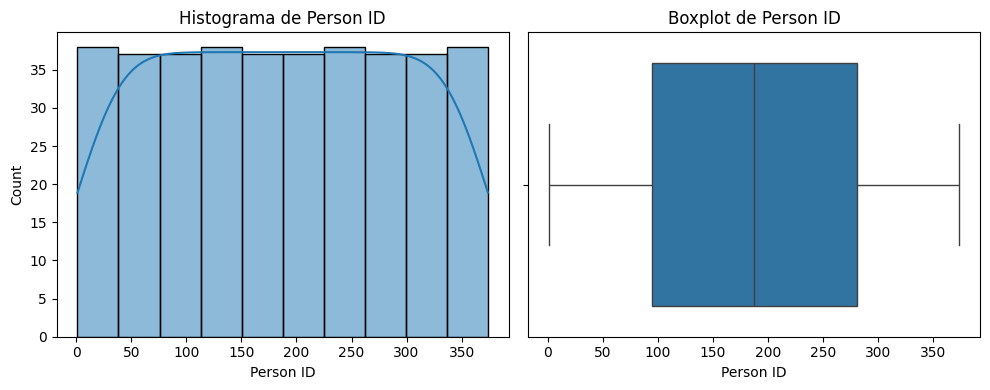

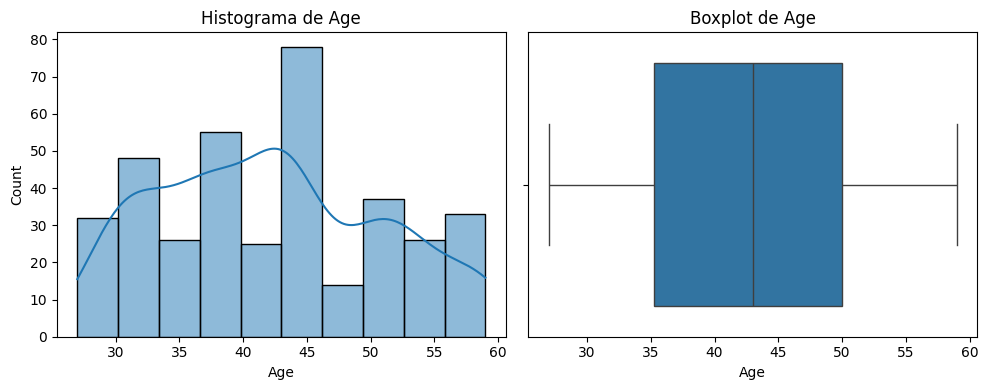

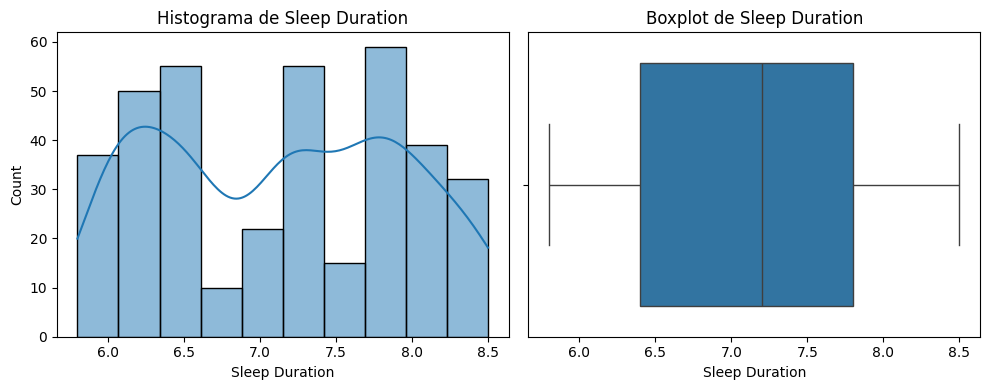

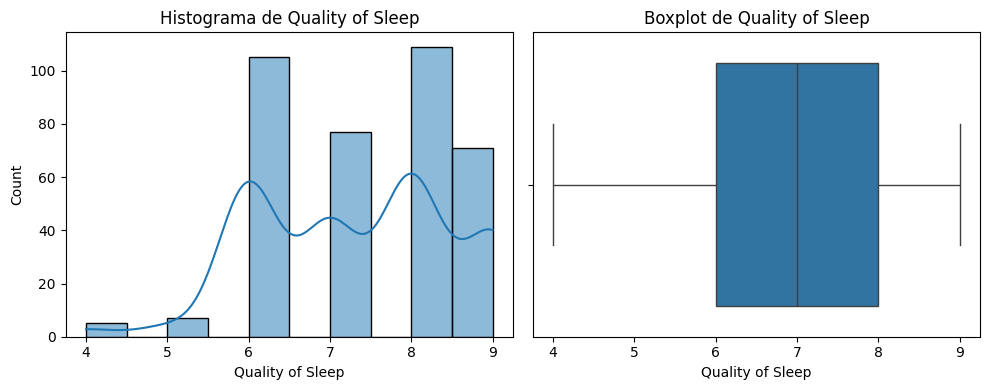

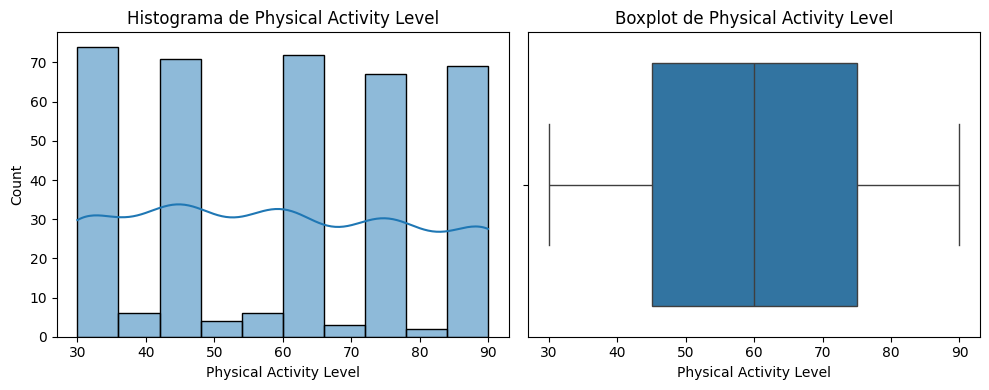

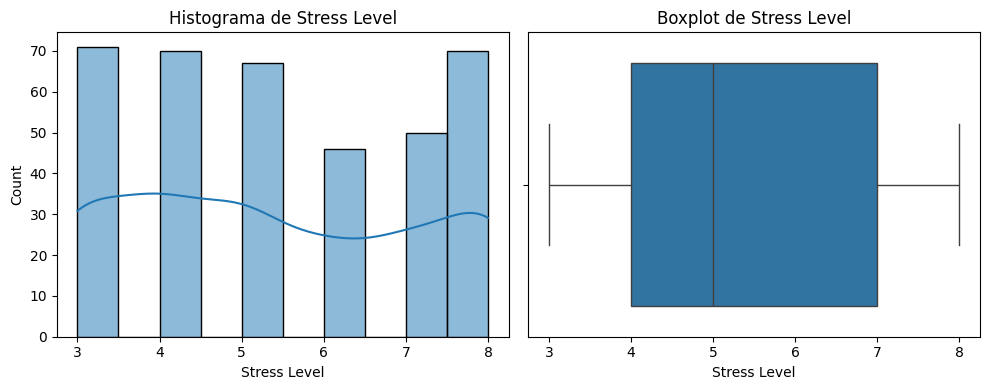

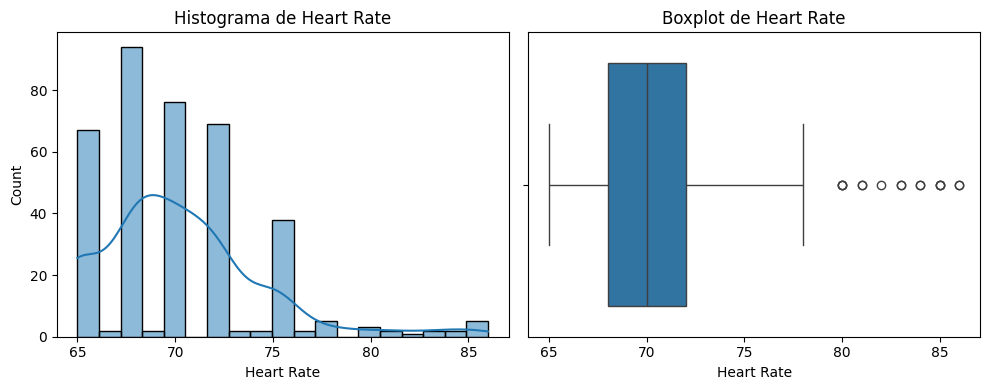

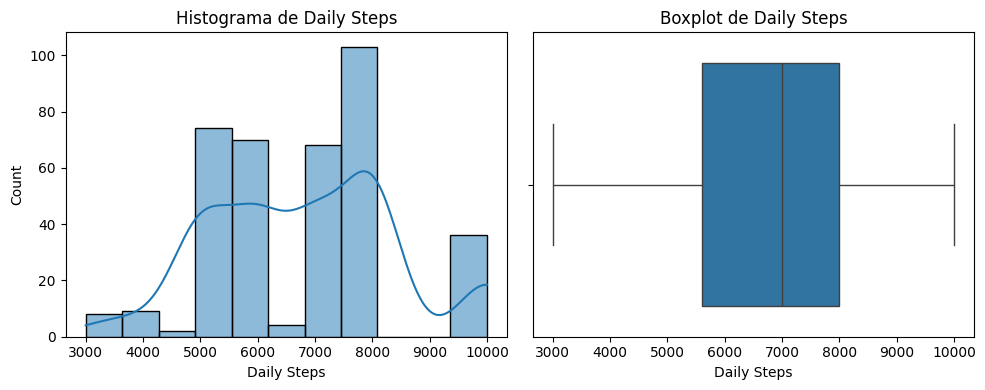

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()


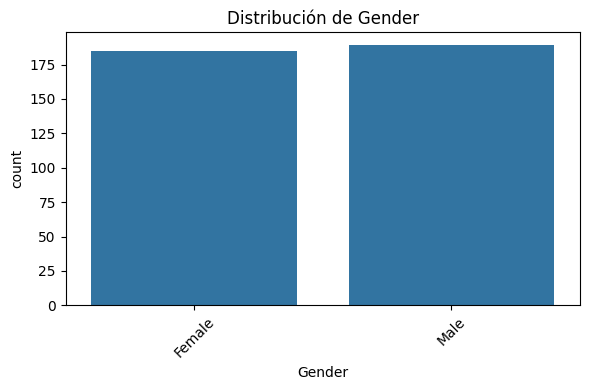

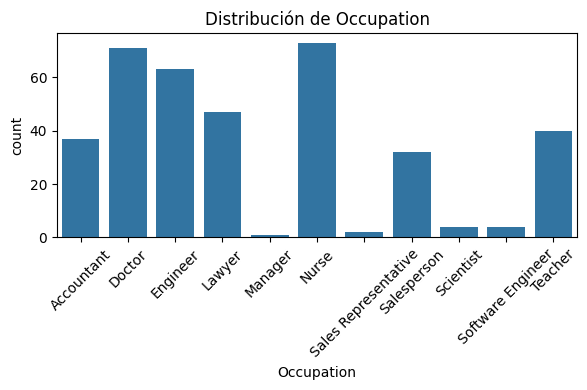

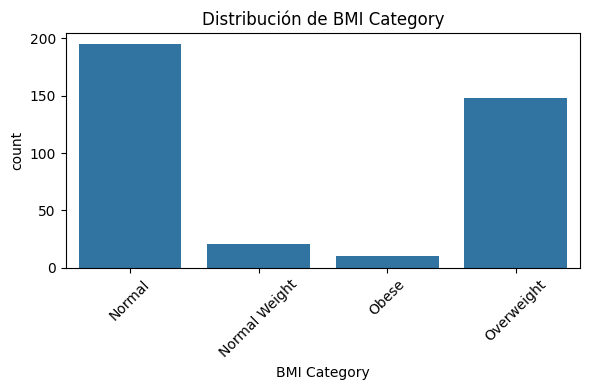

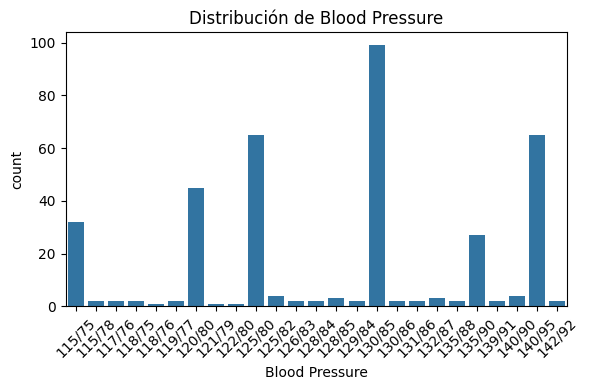

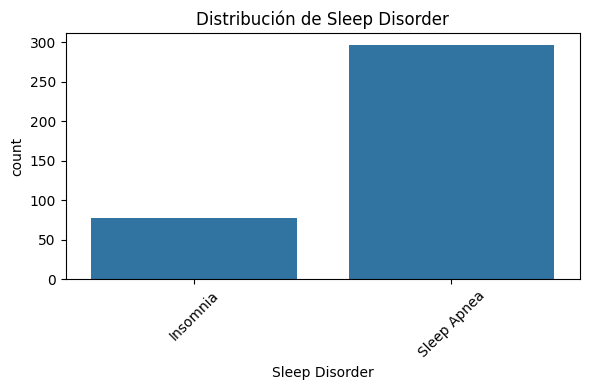

In [11]:
categorical_cols = df.select_dtypes(include='category').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


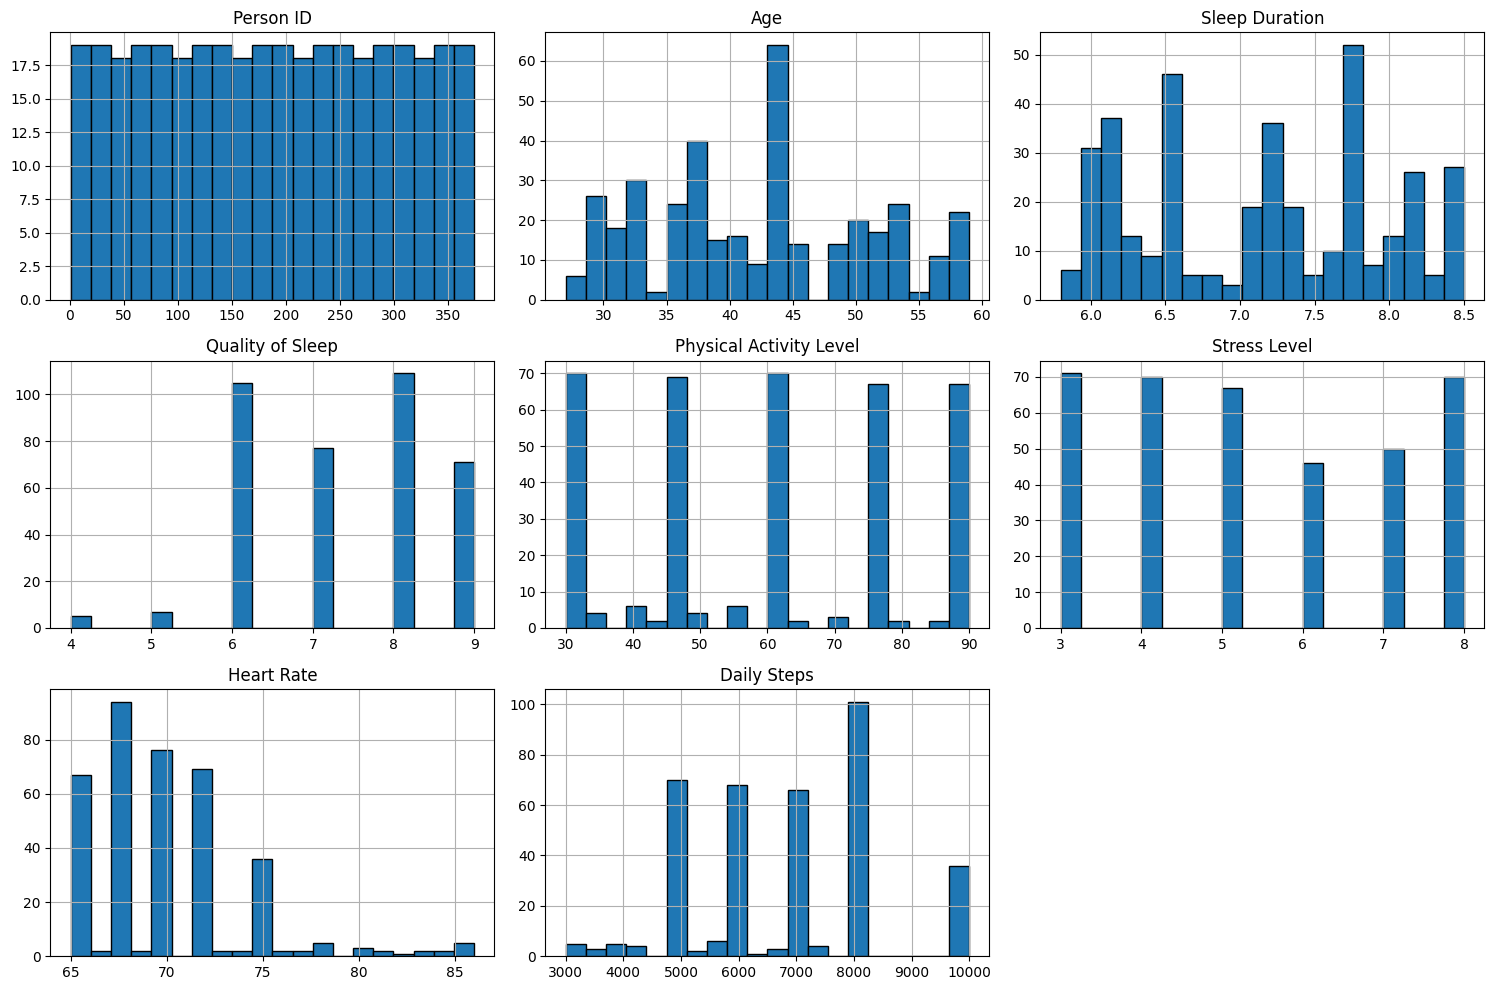

In [12]:
# Histograma para variables numéricas
df.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.tight_layout()
plt.show()

- ¿Para qué sirve el análisis univariante?
- Detectar errores y outliers
- Guiar transformaciones (por ejemplo, logaritmo si está sesgada)
- Diseñar encoding para modelado
- Entender la naturaleza de los datos antes del análisis multivariante

#### Análisis multivariante 
- El análisis multivariante te permite:
- Explorar relaciones entre variables.
- Identificar agrupamientos o patrones.
- Reducir dimensionalidad cuando tienes muchas variables.

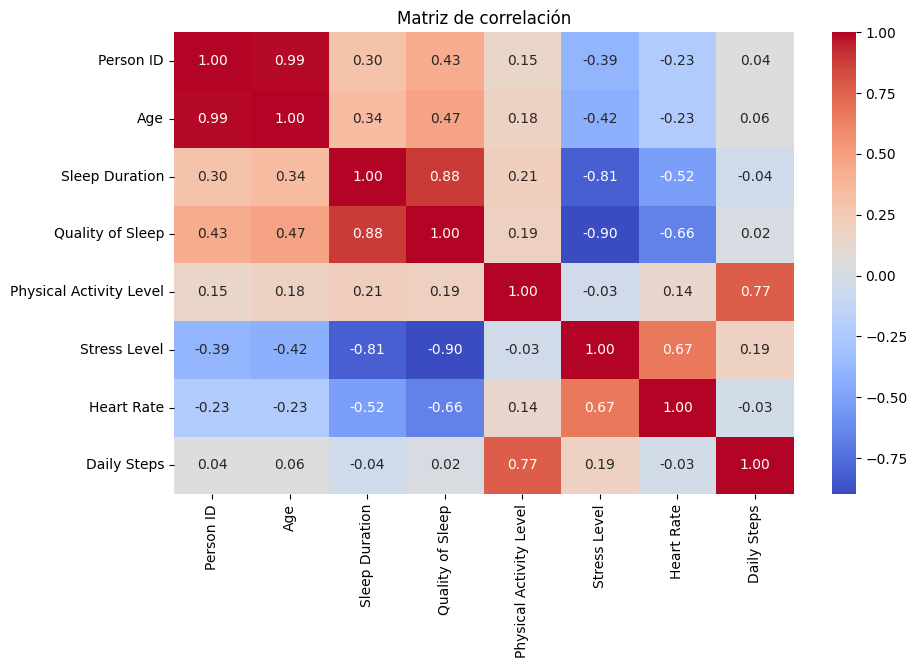

In [13]:
# Matriz de correlaciones
plt.figure(figsize=(10,6))

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

---
#### Se analiza si dormir más se relaciona con mejor calidad del sueño.

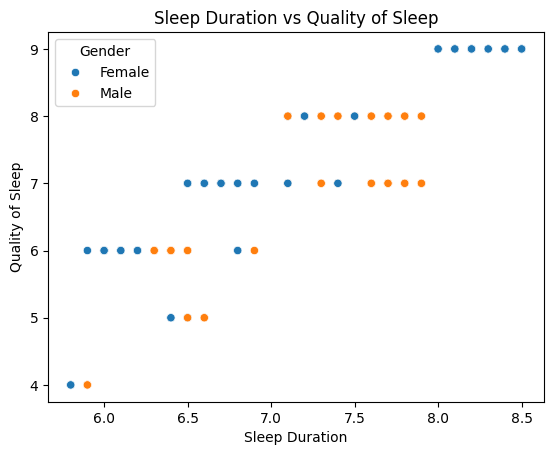

In [14]:
# Calidad de sueño vs. duración del sueño
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='Gender', data=df)
plt.title('Sleep Duration vs Quality of Sleep')
plt.show()

---
#### Analizamos cómo varía la calidad del sueño entre quienes tienen o no trastornos.

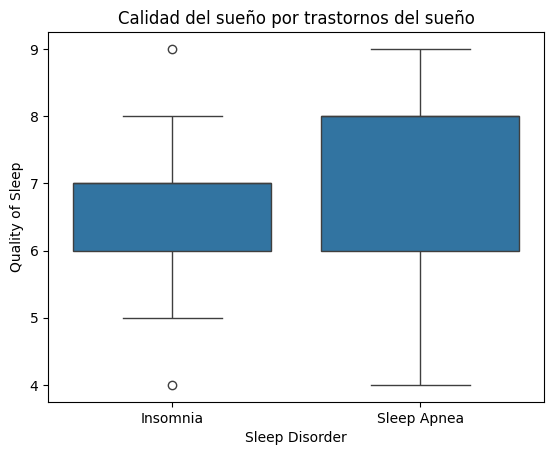

In [15]:
# Boxplot: Calidad de sueño por tipo de trastorno
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df)
plt.title('Calidad del sueño por trastornos del sueño')
plt.show()


---
#### Distribución de la duración del sueño

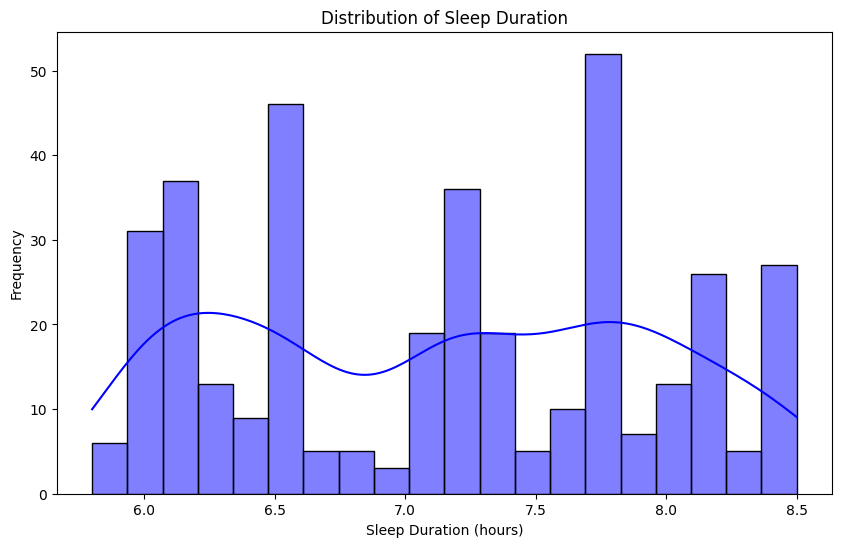

In [16]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True, bins=20, color='blue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

---
#### Nos da una idea de cuántas personas tienen cada tipo de trastorno

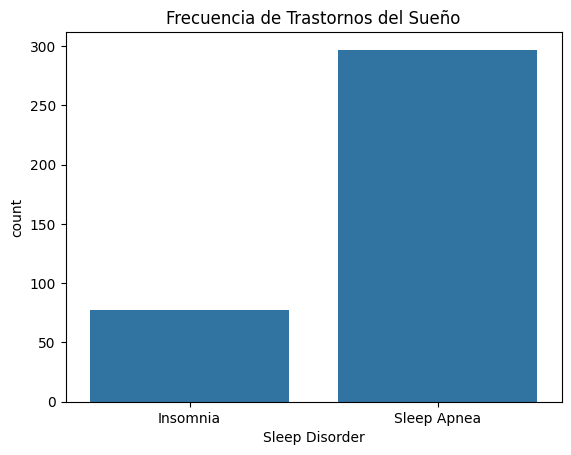

In [17]:
# Conteo de cada tipo de trastorno del sueño
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Frecuencia de Trastornos del Sueño')
plt.show()


---
####  Relacionamos si más actividad física se relaciona con menos estrés

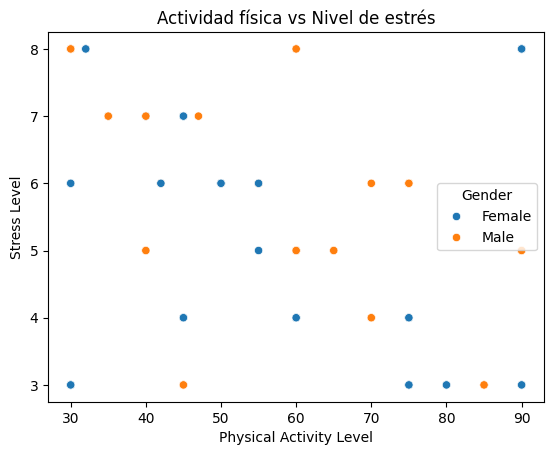

In [18]:
sns.scatterplot(x='Physical Activity Level', y='Stress Level', hue='Gender', data=df)
plt.title('Actividad física vs Nivel de estrés')
plt.show()


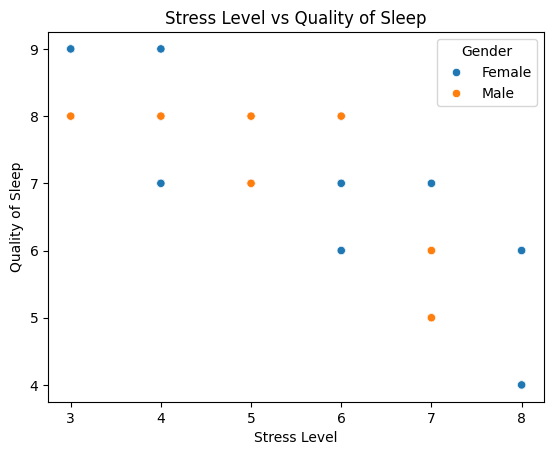

In [19]:
# Bivariate Analysis: Relationship between Stress Level and Quality of Sleep
sns.scatterplot(x='Stress Level', y='Quality of Sleep', hue='Gender', data=df)
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

----

### Feature engineering